In [172]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Definindo as colunas do banco de dados ao ser utilizado

In [173]:
colunas = ["municipio","sexo","tipomovimentacao","idade","categoria","salario", "graudeinstrucao", "secao", "saldomovimentacao"]
meses = ["maio"]

Definindo o caminho do arquivo a ser lido

In [174]:
ferms = ('C:/Users/7eixeira/Desktop/data/2020/' + str(meses[0]) + '/Caged_'+ str(meses[0]) +'.txt')

Lendo o Arquivo CSV, utilizando apenas as colunas necessarias

In [175]:
df = pd.read_csv(ferms, encoding='iso-8859-1', delimiter=";", header = 0, error_bad_lines=False,usecols= colunas)
#df = df[(df['municipio'] == 354990)]

In [176]:
def classeSocial(x):
        if x < 2200:
            return 'E'
        elif x < 4400:
            return 'D'
        elif x < 11000:
            return 'C'
        elif x < 22000:
            return 'B'
        else:
            return 'A'


In [177]:
    def idade(x):
        if x<=25:
            return "18-24 Anos"
        elif x<=32:
            return "25-32 Anos"
        elif x<=40:
            return "32-40 Anos"
        elif x<=48:
            return "40-48 Anos"
        elif x<=56:
            return "48-56 Anos"
        elif x<=56:
            return "48-56 Anos"
        elif x<=70:
            return "57-70 Anos"
        else:
            return "Maior que 71 Anos"

Transformando os valores dos dados para texto

In [178]:
df['Empregado/Desempregado'] = df['categoria'].apply(lambda x: "Empregado" if x==101 or x==102 or x==103 or x==104 or x==105 or x==107 or x==108 or x==108 else "Desempregado")
Sexo = {1: 'Masculino', 3: 'Feminino'}
Escolaridade = {
    1:"Analfabeto",
    2:"Até 5ª Incompleto",
    3:"5ª Completo Fundamental",
    4:"6ª a 9ª Fundamental",
    5:"Fundamental Completo",
    6:"Médio Incompleto",
    7:"Médio Completo",
    8:"Superior Incompleto",
    9:"Superior Completo",
    10:"Mestrado",
    11:"Doutorado",
    80:"Pós-Graduação completa",
    99:"Não Identificado"
}
Setor ={
    "A":"Agricultura, Pecuária, Produção Florestal, Pesca e Aquicultura",
    "B":"Indústrias Extrativas",
    "C":"Indústrias de Transformação",
    "D":"Eletricidade e Gás",
    "E":"Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação",
    "F":"Construção",
    "G":"Comércio, Reparação de Veículos Automotores e Motocicletas",
    "H":"Transporte, Armazenagem e Correio",
    "I":"Alojamento e Alimentação",
    "J":"Informação e Comunicação",
    "K":"Atividades Financeiras, de Seguros e Serviços Relacionados",
    "L":"Atividades Imobiliárias",
    "M":"Atividades Profissionais, Científicas e Técnicas",
    "N":"Atividades Administrativas e Serviços Complementares",
    "O":"Administração Pública, Defesa e Seguridade Social",
    "P":"Educação",
    "Q":"Saúde Humana e Serviços Sociais",
    "R":"Artes, Cultura, Esporte e Recreação",
    "S":"Outras Atividades de Serviços",
    "T":"Serviços Domésticos",
    "U":"Organismos Internacionais e Outras Instituições Extraterritoriais",
    "Z":"Não identificado"
}

df['sexo'] = df['sexo'].map(Sexo)
df['Classe Social'] = df['salario'].apply(lambda x: classeSocial(x))
df['Faixa Etária'] = df['idade'].apply(lambda x:idade(x))
df['graudeinstrucao'] = df['graudeinstrucao'].map(Escolaridade)
df['secao'] = df['secao'].map(Setor)


**Índice de pessoas empregadas/desempregadas, categorizadas por gênero em maio de 2020, no Brasil:**

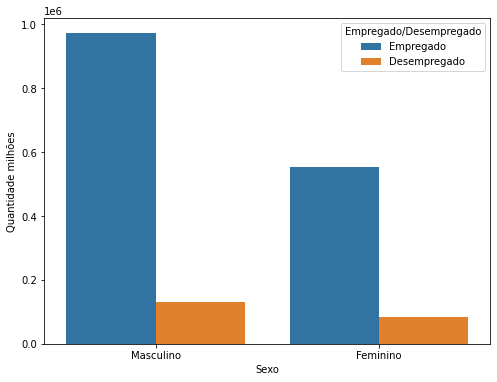

In [190]:
plt.figure(figsize=(8,6))
sns.countplot(x='sexo', data=df, hue='Empregado/Desempregado')
plt.xlabel('Sexo')
plt.ylabel('Quantidade milhões')
plt.show()

**Índice de pessoas empregadas/desempregadas, categorizadas por classe social em maio de 2020, no Brasil:**

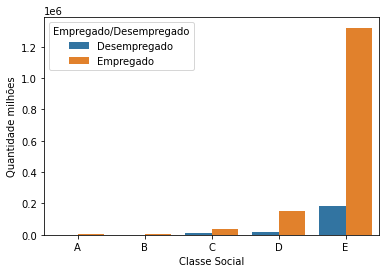

In [180]:
plt.figure(figsize=(8,6))
sns.countplot(x='Classe Social', data=df.sort_values("Classe Social"), hue='Empregado/Desempregado')
plt.xlabel('Classe Social')
plt.ylabel('Quantidade milhões')
plt.show()

**Índice de pessoas empregadas/desempregadas, categorizadas por faixa etária em maio de 2020, no Brasil:**

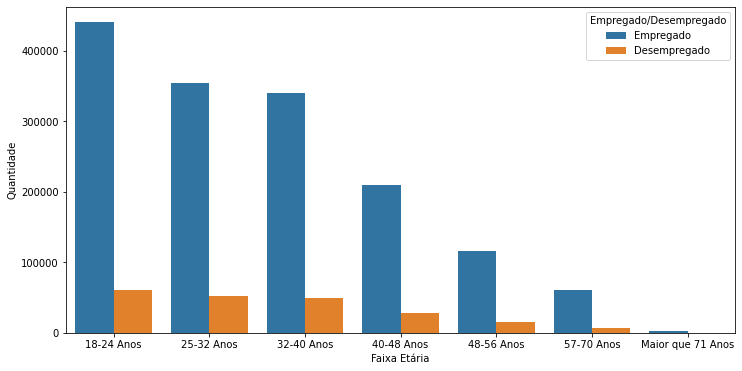

In [181]:
plt.figure(figsize=(12,6))
sns.countplot(x='Faixa Etária', data=df.sort_values("Faixa Etária"), hue='Empregado/Desempregado')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.show()

**Índice de pessoas empregadas/desempregadas, categorizadas por escolaridade em maio de 2020, no Brasil:**

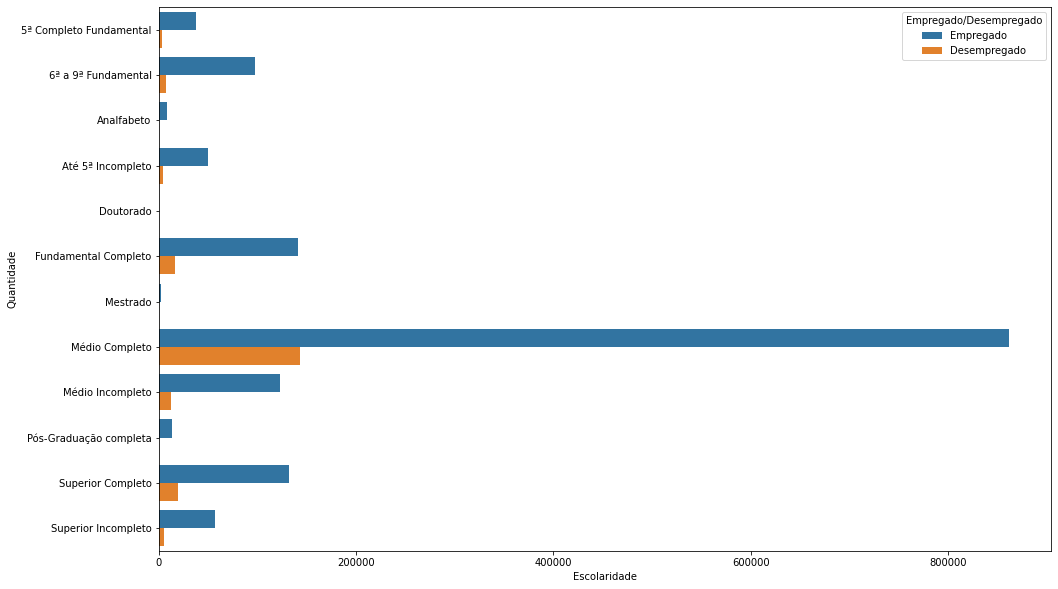

In [182]:
plt.figure(figsize=(16,10))
sns.countplot(y='graudeinstrucao', data=df.sort_values("graudeinstrucao"), hue='Empregado/Desempregado')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade')
plt.show()

**Índice de pessoas empregadas/desempregadas, categorizadas por setor em maio de 2020, no Brasil:**

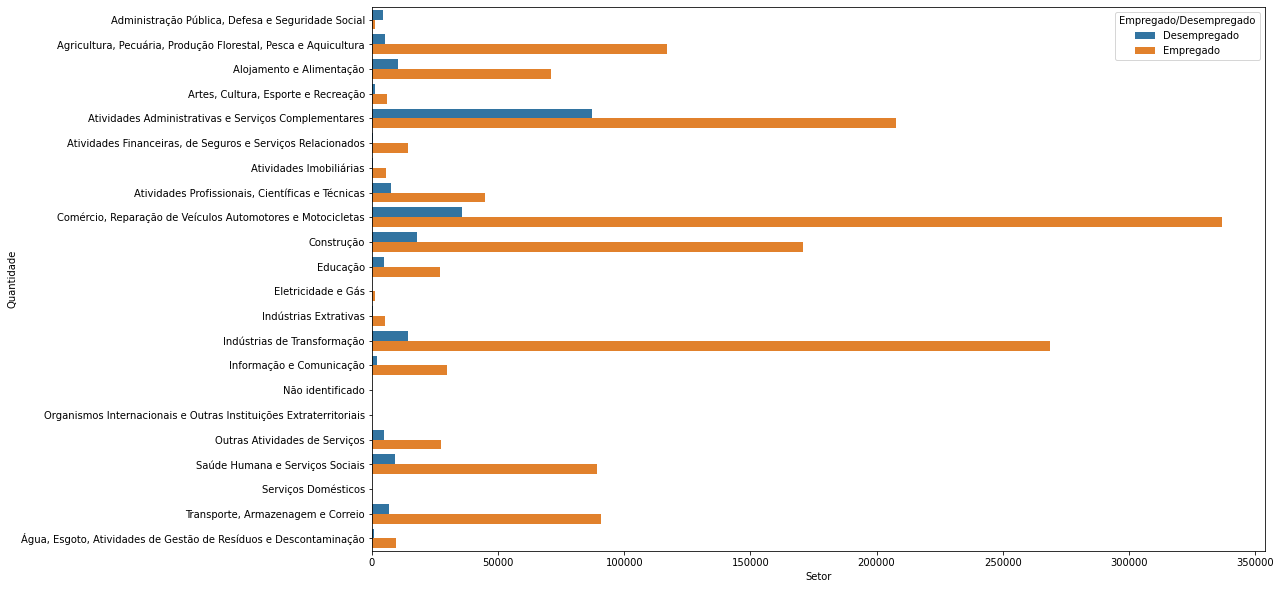

In [183]:
plt.figure(figsize=(16,10))
sns.countplot(y='secao', data=df.sort_values("secao"), hue='Empregado/Desempregado')
plt.xlabel('Setor')
plt.ylabel('Quantidade')
plt.show()

Calculando se houve aumento ou diminuição dos empregados e desempregados no mês de maio

In [184]:
def aumentoOuDiminuicao(chave):
    soma=0
    for i in df['saldomovimentacao']: soma=soma+i
    soma=soma*chave
    if soma>0:
        x='o aumento'
    elif soma<0:
        x='a diminuição'
    else:
        x= 'a estagnação'
    return x

In [185]:
colunas = ["Cidade"]
meses = ["abril","maio", "junho"]

In [186]:
ferms1 = ('C:/Users/7eixeira/Desktop/data/2020/' + str(meses[0]) + '/Consumo_'+ str(meses[0])+'.csv' )
ferms2 = ('C:/Users/7eixeira/Desktop/data/2020/' + str(meses[1]) + '/Consumo_'+ str(meses[1])+'.csv' )
ferms3 = ('C:/Users/7eixeira/Desktop/data/2020/' + str(meses[2]) + '/Consumo_'+ str(meses[2])+'.csv' )

In [187]:
df1 = pd.read_csv(ferms1, encoding='iso-8859-1', delimiter=";", header = 0, error_bad_lines=False,usecols= colunas)
df2 = pd.read_csv(ferms2, encoding='iso-8859-1', delimiter=";", header = 0, error_bad_lines=False,usecols= colunas)
df3 = pd.read_csv(ferms3, encoding='iso-8859-1', delimiter=";", header = 0, error_bad_lines=False,usecols= colunas)

In [188]:
print("\033[1m Estatística de consumo após",aumentoOuDiminuicao(1),"do emprego e",aumentoOuDiminuicao(-1)," do desemprego no mês maio de 2020 no Brasil.\033[0m")

 Estatística de consumo após a diminuição do emprego e o aumento  do desemprego no mês maio de 2020 no Brasil.


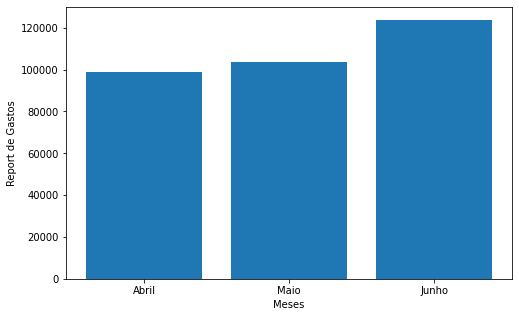

In [191]:
plt.figure(figsize=(8,5))
plt.bar(["Abril","Maio", "Junho"], [len(df1['Cidade']), len(df2['Cidade']), len(df3['Cidade'])])
plt.xlabel('Meses')
plt.ylabel('Report de Gastos')
plt.show()